## DL

In [1]:
from model import BinaryClassificationModel, Classifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,Subset,random_split
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data

In [2]:
data = pd.read_csv('./data.csv')

data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 데이터 표준화
standardized_data_x = scaler.fit_transform(data_x)
data_s_x = pd.DataFrame(standardized_data_x, columns = data_x.columns)

X_train, X_test, y_train, y_test = train_test_split(data_s_x, data_y, test_size=0.2, random_state=0)

### Hyperparameter 찾기

In [4]:
# Tensor로 변환
X_train, X_test, y_train, y_test = train_test_split(standardized_data_x, data_y, test_size=0.2, random_state=0)

X_train_tensor = torch.tensor(X_train,dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.to_list(),dtype = torch.float32).unsqueeze(1)  # y를 (1000, 1) 크기로 변환

X_test_tensor = torch.tensor(X_test,dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.to_list(),dtype = torch.float32).unsqueeze(1)  # y를 (1000, 1) 크기로 변환

In [5]:
parameter = {
    'num_epochs' : [20,30,50],
    'lr' : [0.01,0.001,0.05],
    'batch_size' : [16,32,64],
    'hidden_size1': [32, 64],
    'hidden_size2': [16, 32]
}

random_search = RandomizedSearchCV(estimator=Classifier(), param_distributions=parameter,n_iter = 10, cv=5, scoring='accuracy', verbose=1)
# 그리드 서치 실행
random_search.fit(X_train_tensor, y_train_tensor)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(random_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float().unsqueeze(1))
C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float().unsqueeze(1))
C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy const

C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float().unsqueeze(1))
C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to 

C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float().unsqueeze(1))
C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to 

C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float().unsqueeze(1))
C:\Users\yy950\DataScience\model.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = self.model(torch.tensor(X).float())
C:\Users\yy950\DataScience\model.py:44: UserWarning: To copy construct from a tensor, it is recommended to 

Best parameters found:  {'num_epochs': 30, 'lr': 0.001, 'hidden_size2': 32, 'hidden_size1': 64, 'batch_size': 16}
Best cross-validation accuracy: 0.5801


## train

In [6]:
params = {
    'num_epochs': 30,
    'lr': 0.001,
    'batch_size': 16,
    'hidden_size1': 64,
    'hidden_size2': 32
}
kf = KFold(n_splits=5, shuffle=True, random_state=0)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f'Fold {fold+1}')
    
    # 데이터셋 준비
    train_subset = Subset(TensorDataset(X_train_tensor, y_train_tensor), train_idx.tolist())
    val_subset = Subset(TensorDataset(X_train_tensor, y_train_tensor), val_idx.tolist())
    
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=params['batch_size'], shuffle=False)
    
    # 모델, 손실 함수, 옵티마이저 정의
    model = BinaryClassificationModel()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    
    # 학습 루프
    for epoch in range(params['num_epochs']):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_subset)
        print(f'Epoch {epoch+1}/{params["num_epochs"]}, Loss: {epoch_loss:.4f}')
    
    # 검증 루프
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_subset)
    accuracy = correct / total
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')
    fold_results.append((val_loss, accuracy))

# 교차 검증 결과 출력
fold_results = np.array(fold_results)
mean_loss = fold_results[:, 0].mean()
mean_accuracy = fold_results[:, 1].mean()
print(f'5-Fold Cross-Validation Results:')
print(f'Average Validation Loss: {mean_loss:.4f}')
print(f'Average Validation Accuracy: {mean_accuracy:.4f}')

Fold 1
Epoch 1/30, Loss: 0.6028
Epoch 2/30, Loss: 0.3989
Epoch 3/30, Loss: 0.2583
Epoch 4/30, Loss: 0.2213
Epoch 5/30, Loss: 0.2077
Epoch 6/30, Loss: 0.1980
Epoch 7/30, Loss: 0.1915
Epoch 8/30, Loss: 0.1858
Epoch 9/30, Loss: 0.1822
Epoch 10/30, Loss: 0.1774
Epoch 11/30, Loss: 0.1719
Epoch 12/30, Loss: 0.1680
Epoch 13/30, Loss: 0.1643
Epoch 14/30, Loss: 0.1594
Epoch 15/30, Loss: 0.1541
Epoch 16/30, Loss: 0.1560
Epoch 17/30, Loss: 0.1474
Epoch 18/30, Loss: 0.1438
Epoch 19/30, Loss: 0.1461
Epoch 20/30, Loss: 0.1410
Epoch 21/30, Loss: 0.1402
Epoch 22/30, Loss: 0.1342
Epoch 23/30, Loss: 0.1293
Epoch 24/30, Loss: 0.1295
Epoch 25/30, Loss: 0.1282
Epoch 26/30, Loss: 0.1278
Epoch 27/30, Loss: 0.1234
Epoch 28/30, Loss: 0.1201
Epoch 29/30, Loss: 0.1211
Epoch 30/30, Loss: 0.1168
Validation Loss: 0.2589, Accuracy: 0.9139
Fold 2
Epoch 1/30, Loss: 0.5998
Epoch 2/30, Loss: 0.3974
Epoch 3/30, Loss: 0.2867
Epoch 4/30, Loss: 0.2429
Epoch 5/30, Loss: 0.2262
Epoch 6/30, Loss: 0.2149
Epoch 7/30, Loss: 0.210

## test

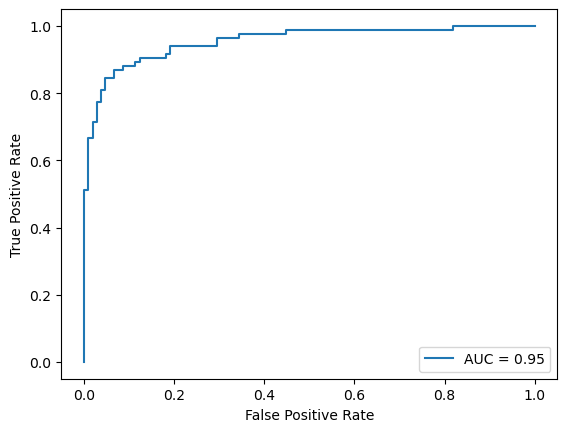

Test Accuracy : 0.8995
Test F1 : 0.8975
AUC: 0.9545351473922903


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# 검증 루프
outputs = model(X_test_tensor)
y_pred = (outputs > 0.5).float()

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='macro')

fpr, tpr, thresholds = roc_curve(y_test, outputs.detach().numpy())
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(f'Test Accuracy : {accuracy:.4f}')
print(f'Test F1 : {f1:.4f}')
print("AUC:", roc_auc)